# The Algorithm X Fellowhip CV Task

## Sidharthenee Nayak

In the below cell firstly I have read the test image into img variable and displayed it using matplotlib

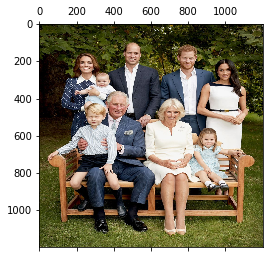

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('test_royalfamilyportrait.jpg')
img = cv.resize(img,(1200,1200))
img = cv.cvtColor(img,  cv.COLOR_BGR2RGB)
plt.matshow(img)


Now I have converted the above RGB image into GRAY for processing and prediction

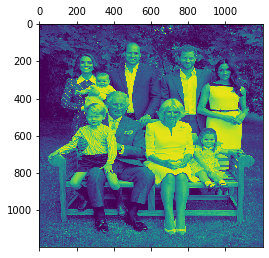

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.matshow(gray)

For Face detection I have using the Haar cascade frontal face classifier to detect the faces of people in the image. Then I have stored the list of detected faces in a list and have drawn a rectangle around each detected image

Number of faces found = 9


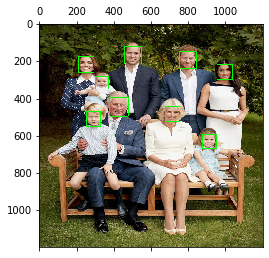

In [4]:
haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=3)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=3)

img = cv.cvtColor(img,  cv.COLOR_BGR2RGB)
cv.imwrite('Detected faces in the test image.jpg', img)
cv.imshow('Detected Faces', img)
cv.waitKey(0)

img = cv.cvtColor(img,  cv.COLOR_BGR2RGB)
plt.matshow(img)


In order to detect and blur the image, we need training data. So, for this purpose I have searched and downloaded images of all members of the royal family and stored them separately in two folders: one folder contains all images of Meghan Markle and the other folder contains images of other members of the royal family. Then I have looped through both the folders and within each folder I have looped through all the images, detected the ROI of the face in each image andd stored them in a list and the corresponding label in another list.

In [5]:
import os
import numpy as np
import cv2 as cv
people = ['Not Meghan','Meghan']
DIR = ''
features=[]
labels=[]
haar_cascade = cv.CascadeClassifier('haar_face.xml')

def training_func():
    for person in people:
        path = person + '/'
        label = people.index(person)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image = cv.imread(img_path)
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            faces_rect = haar_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
            for (x,y,w,h) in faces_rect:
                faces_roi = image[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)
                
training_func()

Below I have printed the length of the training data

In [6]:
print('Length of features =', len(features))
print('Length of features =', len(labels))

Length of features = 85
Length of features = 85


For training purpose, I have converted the lists into numpy arrays

In [7]:
import numpy as np
import cv2 as cv
features = np.array(features, dtype='object')
labels = np.array(labels)

Here I have used the Local Binary Pattern Histogram(LBPH) algorithm model which is suitable to detect frontal and side face 

In [8]:
recognizer = cv.face.LBPHFaceRecognizer_create()
recognizer.train(features,labels)
print('Training completed')

Training completed


As a sample testing, I have printed below one of the features and its corresponfind label

0

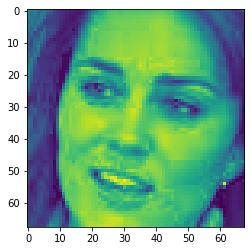

In [9]:
plt.imshow(features[2])
labels[2]

Below I have defined a function which will perform the blurring operation on the image it recives. Here I have performed Gaussian blurring with a default factor of 3 

In [10]:
# import the necessary packages
import numpy as np
import cv2
def blur(image, factor=3.0):
    # automatically determine the size of the blurring kernel base on the spatial dimensions of the input image
    (h, w) = image.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)
    # ensuring that the width of the kernel is odd
    if kW % 2 == 0:
        kW -= 1
    # ensuring that the height of the kernel is odd
    if kH % 2 == 0:
        kH -= 1
    # appling a Gaussian blur to the input image using the computed kernel size
    return cv2.GaussianBlur(image, (kW, kH), 0)

Below I have extracted the test image on stored in different colour channels in different variables 

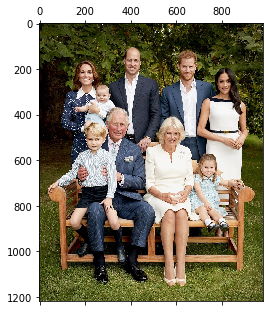

In [11]:
img3 = cv.imread('test_royalfamilyportrait.jpg')
img2 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
plt.matshow(img2)
img4 = img2.copy()

Below I have performed the prediction operation by the model on the test image. I have looped through each face detected in the image and if it is the image of Meghan, the Duchess Sussex then it is not blurred. Otherwise it is blurred. For better blurring I have given a factor of 1.

Label = Not Meghan with a confidence of 128.26264949953182
Label = Not Meghan with a confidence of 90.8657684487545
Label = Not Meghan with a confidence of 98.7768462416651
Label = Not Meghan with a confidence of 120.97815877694757
Label = Not Meghan with a confidence of 101.38453270939202
Label = Not Meghan with a confidence of 98.08043738615375
Label = Meghan with a confidence of 99.31040326234579
Label = Not Meghan with a confidence of 103.53835127420201
Label = Not Meghan with a confidence of 122.35652580815744


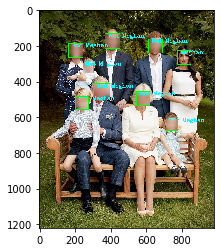

In [12]:
faces_rect = haar_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
for (x,y,w,h) in faces_rect:
    faces_roi = img[y:y+h,x:x+w]
    faces_roi2 = img2[y:y+h,x:x+w]
    label,confidence = recognizer.predict(faces_roi)
    if(label==0):
        face = blur(faces_roi2,factor=1.0)
        img2[y:y+h,x:x+w] = face
        img4[y:y+h,x:x+w] = face
    print(f'Label = {people[label]} with a confidence of {confidence}')
    
    cv.putText(img2, str(people[label]), (int(x+w/4),int(y+h/4)), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,255), thickness=2)
    cv.rectangle(img2, (x,y), (x+w,y+h), (0,255,0), thickness=2)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
cv.imwrite('Final Anonymized image.jpg',img2)
cv.imshow('Final Anonymized image',img2)
cv.waitKey(0)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2)

Below I have displayed the final blurred image without drawing any rectangles

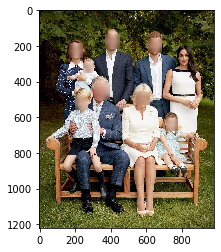

In [13]:
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
cv.imwrite('Final Anonymized image2.jpg',img4)
cv.imshow('Final Anonymized image2',img4)
cv.waitKey(0)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.imshow(img4)